# Losses in PyTorch

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.Scale(28,28),
                                transforms.ToTensor(), 
                               transforms.Normalize([0.5],[0.5]),
                             ])
                              
trainset = datasets.MNIST('MNIST_data/', download = True, train = True,transform= transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)                              

/home/akshita/.local/lib/python3.7/site-packages/torchvision/transforms/transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [5]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))
#Define the loss
criterion = nn.CrossEntropyLoss()

#Get our data
images, labels = next(iter(trainloader))

#Flatten Images
images = images.view(images.shape[0], -1)

#Forward pass get our logits
logits = model(images)
#Calculate the loss with the logits and the labels
loss = criterion(logits,labels)

print(loss)

tensor(2.3199, grad_fn=<NllLossBackward>)


In [6]:
model =  nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

#Define the loss
criterion = nn.NLLLoss()

#Get our data
images, labels = next(iter(trainloader))

#Flatten Images
images = images.view(images.shape[0], -1)

#Forward pass get our logits
logits = model(images)
#Calculate the loss with the logits and the labels
loss = criterion(logits,labels)

print(loss)

tensor(2.2996, grad_fn=<NllLossBackward>)


# Autograd

In [7]:
x=torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.6236,  0.4423],
        [ 0.0521,  0.0625]], requires_grad=True)


In [8]:
y=x**2
print(y)

tensor([[0.3888, 0.1957],
        [0.0027, 0.0039]], grad_fn=<PowBackward0>)


In [9]:
 print(y.grad_fn)

In [10]:
z=y.mean()
print(z)

tensor(0.1478, grad_fn=<MeanBackward0>)


In [11]:
print(x.grad)

None


In [12]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.3118,  0.2212],
        [ 0.0260,  0.0312]])
tensor([[-0.3118,  0.2212],
        [ 0.0260,  0.0312]], grad_fn=<DivBackward0>)


# Loss and Autograd together

In [13]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [14]:
print('before backward pass: \n',model[0].weight.grad)

loss.backward()

print('after backward pass: \n', model[0].weight.grad)

before backward pass: 
 None
after backward pass: 
 tensor([[-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [ 0.0034,  0.0034,  0.0034,  ...,  0.0034,  0.0034,  0.0034],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0048,  0.0048,  0.0048,  ...,  0.0048,  0.0048,  0.0048],
        [ 0.0039,  0.0039,  0.0039,  ...,  0.0039,  0.0039,  0.0039]])


# Training the network!

In [15]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
print('Initial weights - ',model[0].weight)

images,labels= next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ',model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0262, -0.0063,  0.0213,  ..., -0.0039, -0.0098, -0.0173],
        [ 0.0038,  0.0133,  0.0227,  ...,  0.0307,  0.0089, -0.0173],
        [ 0.0286,  0.0288, -0.0039,  ..., -0.0124,  0.0192,  0.0196],
        ...,
        [ 0.0296,  0.0145,  0.0334,  ..., -0.0150, -0.0354, -0.0192],
        [-0.0180,  0.0256,  0.0275,  ...,  0.0237,  0.0059,  0.0077],
        [ 0.0210, -0.0298,  0.0107,  ..., -0.0020,  0.0166, -0.0039]],
       requires_grad=True)
Gradient -  tensor([[ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007]])


In [17]:
optimizer.step()
print('Updated weights = ',model[0].weight)

Updated weights =  Parameter containing:
tensor([[ 0.0262, -0.0063,  0.0213,  ..., -0.0039, -0.0098, -0.0173],
        [ 0.0038,  0.0133,  0.0227,  ...,  0.0307,  0.0089, -0.0173],
        [ 0.0286,  0.0288, -0.0039,  ..., -0.0124,  0.0193,  0.0196],
        ...,
        [ 0.0296,  0.0145,  0.0334,  ..., -0.0150, -0.0354, -0.0192],
        [-0.0180,  0.0256,  0.0275,  ...,  0.0237,  0.0059,  0.0077],
        [ 0.0210, -0.0298,  0.0107,  ..., -0.0020,  0.0166, -0.0038]],
       requires_grad=True)


# Training for Real

In [18]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.03)

epochs=5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+= loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
              

Training loss: 0.628693713752954
Training loss: 0.2828316784092485
Training loss: 0.21802203069681297
Training loss: 0.1720614695329783
Training loss: 0.14346777603451186


In [19]:
!pip install --user helper

In [20]:
import helper

In [21]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-12-23 10:31:46--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.20.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.20.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



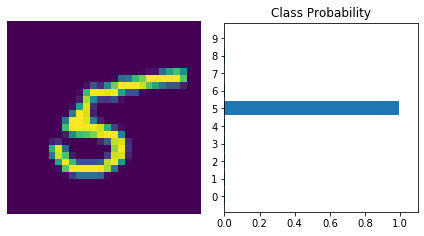

In [23]:
images,labels = next(iter(trainloader))
img = images[0].view(1,784)

with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps)